In [1]:
import os
import sys

import findspark
findspark.init()

In [2]:
from pyspark import SparkContext

In [4]:
sc = SparkContext(master="local[4]")

Exception: Java gateway process exited before sending the driver its port number

In [7]:
import numpy as np

TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0 for i in range(TOTAL)]).cache()
print("Number of random points:", dots.count())

Number of random points: 1000000


In [8]:
stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())

Mean: [-0.00033772 -0.00115697]
stdev: [ 0.57711771  0.57737383]


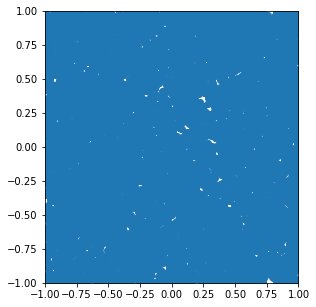

In [9]:
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)).collect()
Y = sample.map(itemgetter(1)).collect()
plt.scatter(X, Y)